# Concept Abstractness
During the last decades, the influence of psycholinguistic properties of words on cognitive processes has become a major topic of scientific inquiry. Among the most studied psycholinguistic attributes are concreteness, familiarity, imagery, and average age of acquisition. Abstractness quantifies the degree to which an expression denotes an entity that can be directly perceived by human senses. As an example, the word "feminism" is usually perceived as abstract, but the word "screwdriver" is associated with a concrete meaning.

We introduce a weakly supervised approach for inferring the property of abstractness of words and expressions in the complete absence of labeled data. Exploiting only minimal linguistic clues and the contextual usage of a concept as manifested in textual data, we train sufficiently powerful classifiers, obtaining high correlation with human labels. The released dataset contains 300K Wikipedia concepts automatically rated for their degree of abstractness.

In this notebook we explore the [Concept Abstractness](https://www.research.ibm.com/haifa/dept/vst/debating_data.shtml#Concept%20Abstractness) dataset. The dataset can be obtained for free from the IBM Developer [Data Asset Exchange](https://developer.ibm.com/exchanges/data/).

### Table of Contents:
* [1. Loading the Data](#cell1)
* [2. Data Visualization](#cell2)
* [3. Data Cleaning and Mining](#cell3)
* [4. Test Data Prediction](#cell4)

<a id="cell1"></a>
## Loading the Data

In [1]:
import sys
import requests
import tarfile
import re
from os import path
from pandas import DataFrame as df
# Downloading the dataset
# specifying the zip file name 
fname = 'concept-abstractness.tar.gz'
url = 'http://s3.us-south.cloud-object-storage.appdomain.cloud/dax-assets-dev/dax-concept-abstractness/1.0.0/' + fname
r = requests.get(url)
open(fname , 'wb').write(r.content)

3565650

In [2]:
# Extracting the dataset
tar = tarfile.open(fname)
tar.extractall()
tar.close()

In [3]:
# Verifying the file was extracted properly
data_path = "prediction_unigrams.csv"
path.exists(data_path)

True

In [4]:
# load dataset into notebook
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
# Using pandas to read the data 
model = pd.read_csv(data_path)
# Preview the first 5 lines of the loaded data 
model.head()

,Concept,Score
0,aabavanan,0.224343
1,aabenraa,0.131792
2,aabey,0.300266
3,aachen,0.171785
4,aachtopf,0.089984


In [5]:
# Check the size of the data
len(model)

99954

<a id="cell2"></a>
## Data Visulization

In [6]:
# Data Visualization of abstractness distribution
#import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

(0.0, 2990.0)

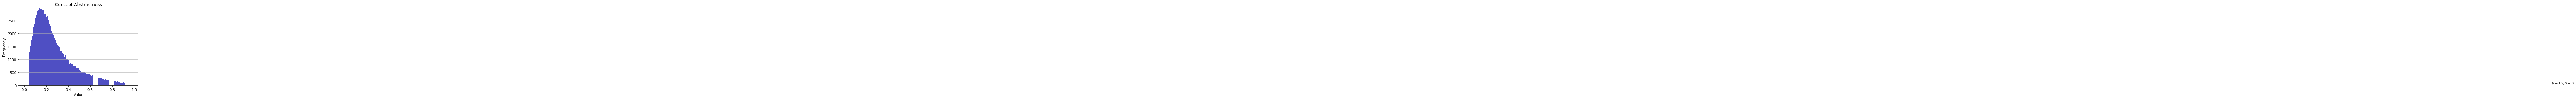

In [7]:
# Generate Histogram
X = model['Score']
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=X, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Concept Abstractness')
plt.text(23, 45, r'$\mu=15, b=3$')
plt.rcParams['figure.dpi'] = 50
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

<a id="cell3"></a>
## Data Cleaning and Manipulation

In [8]:
# Load Testing Data
import sys
import requests
import tarfile
import re
from os import path
from pandas import DataFrame as df
# Downloading the dataset
# specifying the zip file name 
fname = 'thematic-clustering-of-sentences.tar.gz'
url = 'http://s3.us-south.cloud-object-storage.appdomain.cloud/dax-assets-dev/dax-thematic-clustering-of-sentences/1.0.0/' + fname
r = requests.get(url)
open(fname , 'wb').write(r.content)
# Extracting the dataset
tar = tarfile.open(fname)
tar.extractall()
tar.close()
# Verifying the file was extracted properly
data_path = "dataset.csv"
path.exists(data_path)

True

In [9]:
# test data
text = pd.read_csv(data_path)
# Inspecting the fields
list(text.columns) 

['Article Title', 'Sentence', 'SectionTitle', 'Article Link']

In [10]:
# Inspecting the dtypes
text.dtypes

Article Title    object
Sentence         object
SectionTitle     object
Article Link     object
dtype: object

In [11]:
# Extract the title of the data
text = list(text.groupby(['Article Title']).groups.keys())
len(text)

692

In [12]:
# create dictionary
dictionary = model.set_index('Concept').T.to_dict('list')

## Prediction

In [13]:
# Load Packages
from nltk.tokenize import word_tokenize

In [14]:
# Python program to get average of a list 
def Average(lst): 
    return sum(lst) / len(lst) 

In [15]:
# Calculate Prediction score of test data
def predict_abstract(model, text):
    # Extract all of the concepts in the model
    word_tokens = list(model['Concept'])
    df = pd.DataFrame(columns = ['Concept', 'prediction score'])
    for i in text:
        title_tokens = word_tokenize(i)
        filtered_sentence = [w for w in title_tokens if w in word_tokens]
        scores = []
        if len(filtered_sentence)>0:
            for j in filtered_sentence:
                x = dictionary[j]
                scores.append(x[0])
            # Take the average of multiple abstract concept scores
            score = Average(scores)
            df = df.append({'Concept': i, 'prediction score': score}, ignore_index=True)
    return df

In [16]:
# Show the top 20 lines of prediction score
df = predict_abstract(model, text)
df.head(20)

,Concept,prediction score
0,1920s in sociology,0.553010
1,1955 in the Vietnam War,0.423878
2,2009 NFL season,0.308886
3,A Trip to the Moon,0.423878
4,Account planning,0.542075
5,Adult comics,0.407683
6,"Afghan presidential election, 2009",0.527030
7,Ancient Greek phonology,0.691283
8,Athabasca oil sands,0.377176
9,Automotive industry in the United States,0.423878


# Explanation and interpretation of the data results

what does high scores means? What does low scores means?
For example, "Child sexual abuse" has a comparatively high score 0.7156. It means this phrase is relatively abstract because it does not specific the location, details and persona of the event. On the other hand, the phrase "2009 NFL season" represents more concrete details.